In [1]:
#Equla width binning is one of the binnig technique in Unsuperwised binning

#   (max_value - min_value)/nor of bins

In [73]:
# This binning technique help us to handle the outliers

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
67,0,3,male,19.0,0,0,8.1583,S,Third,man,True,NaN,Southampton,no,True
157,0,3,male,30.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
378,0,3,male,20.0,0,0,4.0125,C,Third,man,True,NaN,Cherbourg,no,True
596,1,2,female,NaN,0,0,33.0000,S,Second,woman,False,NaN,Southampton,yes,True
820,1,1,female,52.0,1,1,93.5000,S,First,woman,False,B,Southampton,yes,False


<Axes: >

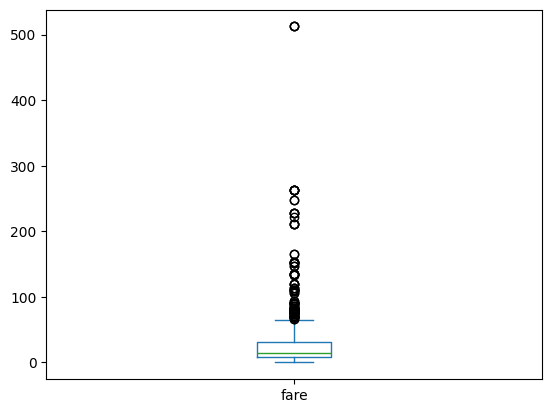

In [7]:
df['fare'].plot(kind = 'box')

In [8]:
df.fare.min()

np.float64(0.0)

In [9]:
df.fare.max()

np.float64(512.3292)

In [10]:
# here max - main  / no of bins

In [36]:
no_of_bins = int(input("Enter the number of bins"))

Enter the number of bins 100


In [37]:
(df.fare.max() - df.fare.min())/no_of_bins

np.float64(5.123292)

In [38]:
a = pd.cut(df.fare, bins= no_of_bins)

In [39]:
a

0       (5.123, 10.247]
1      (66.603, 71.726]
2       (5.123, 10.247]
3      (51.233, 56.356]
4       (5.123, 10.247]
             ...       
886     (10.247, 15.37]
887     (25.616, 30.74]
888    (20.493, 25.616]
889     (25.616, 30.74]
890     (5.123, 10.247]
Name: fare, Length: 891, dtype: category
Categories (100, interval[float64, right]): [(-0.512, 5.123] < (5.123, 10.247] < (10.247, 15.37] < (15.37, 20.493] ... (491.836, 496.959] < (496.959, 502.083] < (502.083, 507.206] < (507.206, 512.329]]

In [40]:
a.value_counts()

fare
(5.123, 10.247]       320
(10.247, 15.37]       129
(25.616, 30.74]       104
(15.37, 20.493]        53
(20.493, 25.616]       43
                     ... 
(476.466, 481.589]      0
(486.713, 491.836]      0
(491.836, 496.959]      0
(496.959, 502.083]      0
(502.083, 507.206]      0
Name: count, Length: 100, dtype: int64

<Axes: >

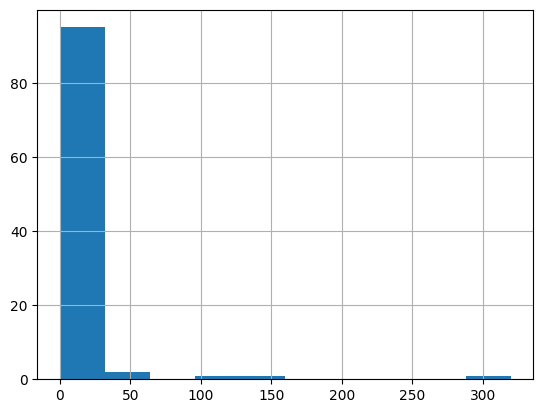

In [41]:
a.value_counts().hist()

<Axes: xlabel='fare'>

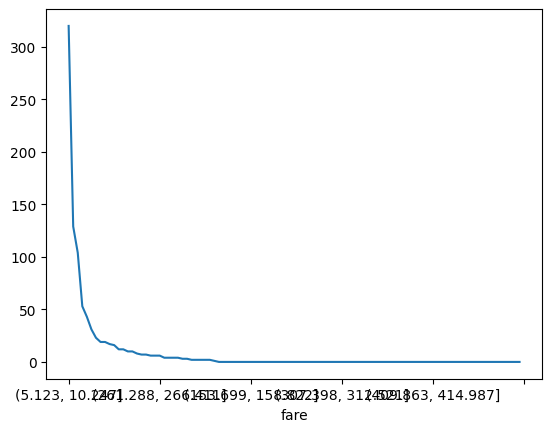

In [48]:
a.value_counts().plot(kind = 'line')

<h1>Sklearn Implimentation</h1>

In [49]:
from sklearn.preprocessing import KBinsDiscretizer

In [65]:
binn = KBinsDiscretizer(encode='ordinal', strategy='uniform', n_bins=100)
bin = binn.fit_transform(np.array(df.fare).reshape(len(df),1))

<Axes: ylabel='Count'>

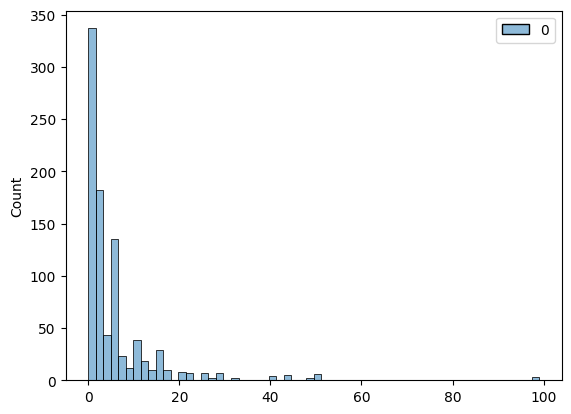

In [66]:
sns.histplot(data = bin)

In [67]:
binn.bin_edges_

array([array([  0.      ,   5.123292,  10.246584,  15.369876,  20.493168,
               25.61646 ,  30.739752,  35.863044,  40.986336,  46.109628,
               51.23292 ,  56.356212,  61.479504,  66.602796,  71.726088,
               76.84938 ,  81.972672,  87.095964,  92.219256,  97.342548,
              102.46584 , 107.589132, 112.712424, 117.835716, 122.959008,
              128.0823  , 133.205592, 138.328884, 143.452176, 148.575468,
              153.69876 , 158.822052, 163.945344, 169.068636, 174.191928,
              179.31522 , 184.438512, 189.561804, 194.685096, 199.808388,
              204.93168 , 210.054972, 215.178264, 220.301556, 225.424848,
              230.54814 , 235.671432, 240.794724, 245.918016, 251.041308,
              256.1646  , 261.287892, 266.411184, 271.534476, 276.657768,
              281.78106 , 286.904352, 292.027644, 297.150936, 302.274228,
              307.39752 , 312.520812, 317.644104, 322.767396, 327.890688,
              333.01398 , 338.137272, 

In [68]:
binn.get_feature_names_out

<bound method KBinsDiscretizer.get_feature_names_out of KBinsDiscretizer(encode='ordinal', n_bins=100, strategy='uniform')>

In [69]:
binn.quantile_method

'warn'

In [70]:
binn.n_bins

100

In [72]:
binn.inverse_transform

<bound method KBinsDiscretizer.inverse_transform of KBinsDiscretizer(encode='ordinal', n_bins=100, strategy='uniform')>